# Analyse Cancer Data


## Task A
## Enable the user to get data from a CSV file

In [1]:
from src.wrangling.extract_data_csv import get_csv_data
from src.wrangling.userInterface.user_selections import set_user_file, data_path

# prompt the user to enter the dataset to be analysed
# file_name = set_user_file()
file_name = "lung_cancer_data.csv"

patient_headers, csv_reader = get_csv_data(data_path, file_name)



dataset headers:
('Patient_ID', 'Age', 'Gender', 'Smoking_History', 'Tumor_Size_mm', 'Tumor_Location', 'Stage', 'Treatment', 'Survival_Months', 'Ethnicity', 'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other', 'Performance_Status', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Haemoglobin_Level', 'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level', 'Sodium_Level', 'Smoking_Pack_Years')


## a1. Retrieve demographic information: age, gender, smoking history, and ethnicity based on the patient ID

In [4]:
from src.wrangling.extract_data_csv import demographic_info
from src.wrangling.userInterface.user_selections import set_patient_id

demographic_info(set_patient_id(), csv_reader, patient_headers)
        

Demographic info for patient ID: 24721
| Age             | Gender          | Smoking_History | Ethnicity       |
-------------------------------------------------------------------------
| 76              | Male            | Former Smoker   | African American |



## a2. Retrieve medical history details including family history of lung cancer, comorbidities of diabetes disease, comorbidities of kidney disease, and the haemoglobin level associated with a certain ethnicity. 

In [2]:
from src.wrangling.extract_data_csv import medical_history
from src.wrangling.userInterface.user_selections import set_patient_ethnicity

medical_history(set_patient_ethnicity(), csv_reader, patient_headers)
        

Records for patients of African american ethnicity:
| Family_History             | Comorbidity_Diabetes       | Comorbidity_Kidney_Disease | Haemoglobin_Level          |
---------------------------------------------------------------------------------------------------------------------
| Yes                        | No                         | Yes                        | 14.47                      |
| Yes                        | Yes                        | Yes                        | 17.44                      |
| No                         | Yes                        | Yes                        | 16.71                      |
| No                         | Yes                        | No                         | 12.02                      |
| No                         | Yes                        | No                         | 13.81                      |
| No                         | No                         | Yes                        | 11.95                      |
| Ye

## a3. Retrieve treatment details including age, tumor size, tumor location, and tumor stage of patients who have survived more than 100 months on a certain treatment. 

In [3]:
from src.wrangling.extract_data_csv import survival_treatment_details
survival_period_months = 100

survival_treatment_details(survival_period_months, csv_reader, patient_headers)


Patient records for survival greater than 100 months on treatment:

| Age            | Tumor_Size_mm  | Tumor_Location | Stage          |
---------------------------------------------------------------------
| 58             | 78.45          | Lower Lobe     | Stage I        |
| 37             | 87.27          | Lower Lobe     | Stage IV       |
| 48             | 68.1           | Lower Lobe     | Stage IV       |
| 51             | 35.15          | Upper Lobe     | Stage I        |
| 31             | 86.46          | Upper Lobe     | Stage III      |
| 41             | 69.33          | Upper Lobe     | Stage III      |
| 51             | 28.12          | Middle Lobe    | Stage III      |
| 78             | 40.47          | Middle Lobe    | Stage IV       |
| 50             | 17.51          | Lower Lobe     | Stage IV       |
| 76             | 58.55          | Lower Lobe     | Stage IV       |
| 73             | 61.59          | Lower Lobe     | Stage III      |
| 76             | 20.

## a4. For patients that have high blood pressure...
### display treatment type, insurance type, performance status and whether the patient has chronic lung disease.



In [4]:
from src.wrangling.extract_data_csv import hypertension_patients
''' 
    use a suitable value for patient's blood pressure above a desired target
    for cancer patient's. Value obtained from:
    https://cardiooncologyjournal.biomedcentral.com/articles/10.1186/s40959-023-00197-8
'''
blood_press_diastolic_target = 140

hypertension_patients(blood_press_diastolic_target, csv_reader, patient_headers)


Treatment records for patients with diastolic blood pressure above 140 target or hypertension:

| Treatment                        | Insurance_Type                   | Performance_Status               | Comorbidity_Chronic_Lung_Disease |
---------------------------------------------------------------------------------------------------------------------------------------------
| Surgery                          | Medicare                         | 3                                | No                               |
| Radiation Therapy                | Private                          | 4                                | No                               |
| Chemotherapy                     | Other                            | 0                                | Yes                              |
| Chemotherapy                     | Medicare                         | 1                                | No                               |
| Radiation Therapy                | Medicaid       

# Task B

In [2]:
import pandas as pd
from src.wrangling.userInterface.user_selections import set_patient_ethnicity

lung_cancer_df = pd.read_csv(data_path+file_name, sep=',', encoding='utf8')

ethnicity_selection = set_patient_ethnicity()

# lung_cancer_df.head()

## b1. Identify the top 3 treatments for a certain ethnicity where patients have survived more than 100 months.

In [4]:
from src.wrangling.extract_data_pd import patient_long_survival

patient_long_survival(ethnicity_selection, lung_cancer_df)



Top three treatments for Asian group - Surival > 100 months
Treatment
Surgery              288
Radiation Therapy    224
Chemotherapy         149
Name: count, dtype: int64


## b2. Analyse the average white blood cell counts for certain treatments based on a certain ethnicity.

In [3]:
from src.wrangling.extract_data_pd import treatment_white_blood_count

treatment_white_blood_count(ethnicity_selection, lung_cancer_df)

Average white blood cell count for each treatment in Asian ethnic group
Treatment
Chemotherapy         6.765347
Radiation Therapy    6.735361
Surgery              6.761766
Targeted Therapy     6.623431
Name: White_Blood_Cell_Count, dtype: float64


## b3. Analyse the average number of smoking packs for patients in each treatment group, with a blood pressure (pulse) over 90 and a tumor size smaller than 15.0 mm, based by tumor location

In [12]:
# Filter by pulse > 90 and tumor size < 15.0, keeping only the columns we need.
lung_tumor_df = lung_cancer_df.loc[(lung_cancer_df.Blood_Pressure_Pulse > 90) & (lung_cancer_df.Tumor_Size_mm < 15.0), 
                                   ['Smoking_Pack_Years', 'Treatment', 'Tumor_Location']]\
                                       .reset_index()

# group by tumor location and treatment type, finding the average smoking packs for each group
lung_tumor_df = lung_tumor_df.groupby(["Tumor_Location", "Treatment"])\
    .Smoking_Pack_Years.mean()\
        .reset_index()

lung_tumor_df


,Tumor_Location,Treatment,Smoking_Pack_Years
0,Lower Lobe,Chemotherapy,53.168824
1,Lower Lobe,Radiation Therapy,41.365357
2,Lower Lobe,Surgery,51.673684
3,Lower Lobe,Targeted Therapy,43.178000
4,Middle Lobe,Chemotherapy,51.408966
5,Middle Lobe,Radiation Therapy,50.610741
6,Middle Lobe,Surgery,53.086923
7,Middle Lobe,Targeted Therapy,48.728000
8,Upper Lobe,Chemotherapy,55.259167
9,Upper Lobe,Radiation Therapy,54.349583


## b4. Average survival duration and blood pressure metrics for each treatment at each cancer stage, based on gender.

In [13]:
''' Group by gender, treatment, and cancer stage.
    Then, find the average survival duration and blood pressure levels
    for each cancer stage.
    Finally, reset the index to remove the Dataframe levels
    and provide a sequential index
'''
survival_cancer_df = lung_cancer_df.groupby(['Gender', 'Treatment', 'Stage'])\
    [['Survival_Months', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Systolic']].mean()\
        .reset_index()

survival_cancer_df



,Gender,Treatment,Stage,Survival_Months,Blood_Pressure_Diastolic,Blood_Pressure_Systolic
0,Female,Chemotherapy,Stage I,60.248746,84.935807,135.046138
1,Female,Chemotherapy,Stage II,58.147173,84.839181,135.857700
2,Female,Chemotherapy,Stage III,61.280648,84.046606,134.417427
3,Female,Chemotherapy,Stage IV,59.418534,83.984725,134.873727
4,Female,Radiation Therapy,Stage I,60.198903,84.496571,136.865569
5,Female,Radiation Therapy,Stage II,60.234328,84.180597,134.776119
6,Female,Radiation Therapy,Stage III,60.650771,85.026648,135.220196
7,Female,Radiation Therapy,Stage IV,59.798649,84.309459,133.635135
8,Female,Surgery,Stage I,58.836957,84.631988,134.723602
9,Female,Surgery,Stage II,61.122137,84.374046,135.273282


## Task C
### c1. Create a chart to illustrate the proportion of cancer treatments among a certain ethnicity as specified by the user.

In [89]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

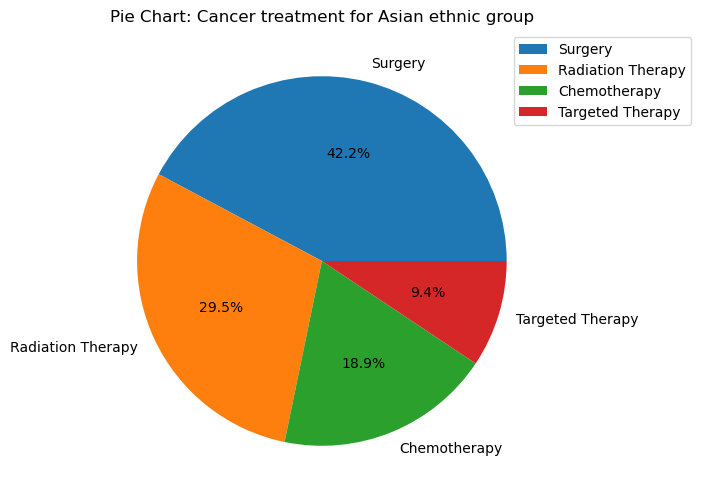

In [172]:
ethnicity = input("Enter patient ethnicity...")

grp = lung_cancer_df.groupby('Ethnicity')
grp = grp.get_group(ethnicity)

# create a Series of value counts of each treatment
grp_treatment_counts = grp.Treatment.value_counts()

# retrieve the index lables from the Series and put them into a list
treatment_list = grp_treatment_counts.index.to_list()
# get the values of the Series and put into a list
treatment_count = grp_treatment_counts.to_list() #grp['count'].to_list()
# create a figure
fig = plt.figure(figsize=(10,6))

# plot a pie chart
plt.pie(treatment_count, labels=treatment_list, autopct='%1.1f%%')

# set a plot title and legend
plt.title(f"Pie Chart: Cancer treatment for {ethnicity} ethnic group")
plt.legend(loc="upper left", bbox_to_anchor=(0.9,1))

# show the chart
plt.show()


## c2. Create a chart to show the trend of average smoking packs consumption across different cancer stages for each ethnicity within a single chart.

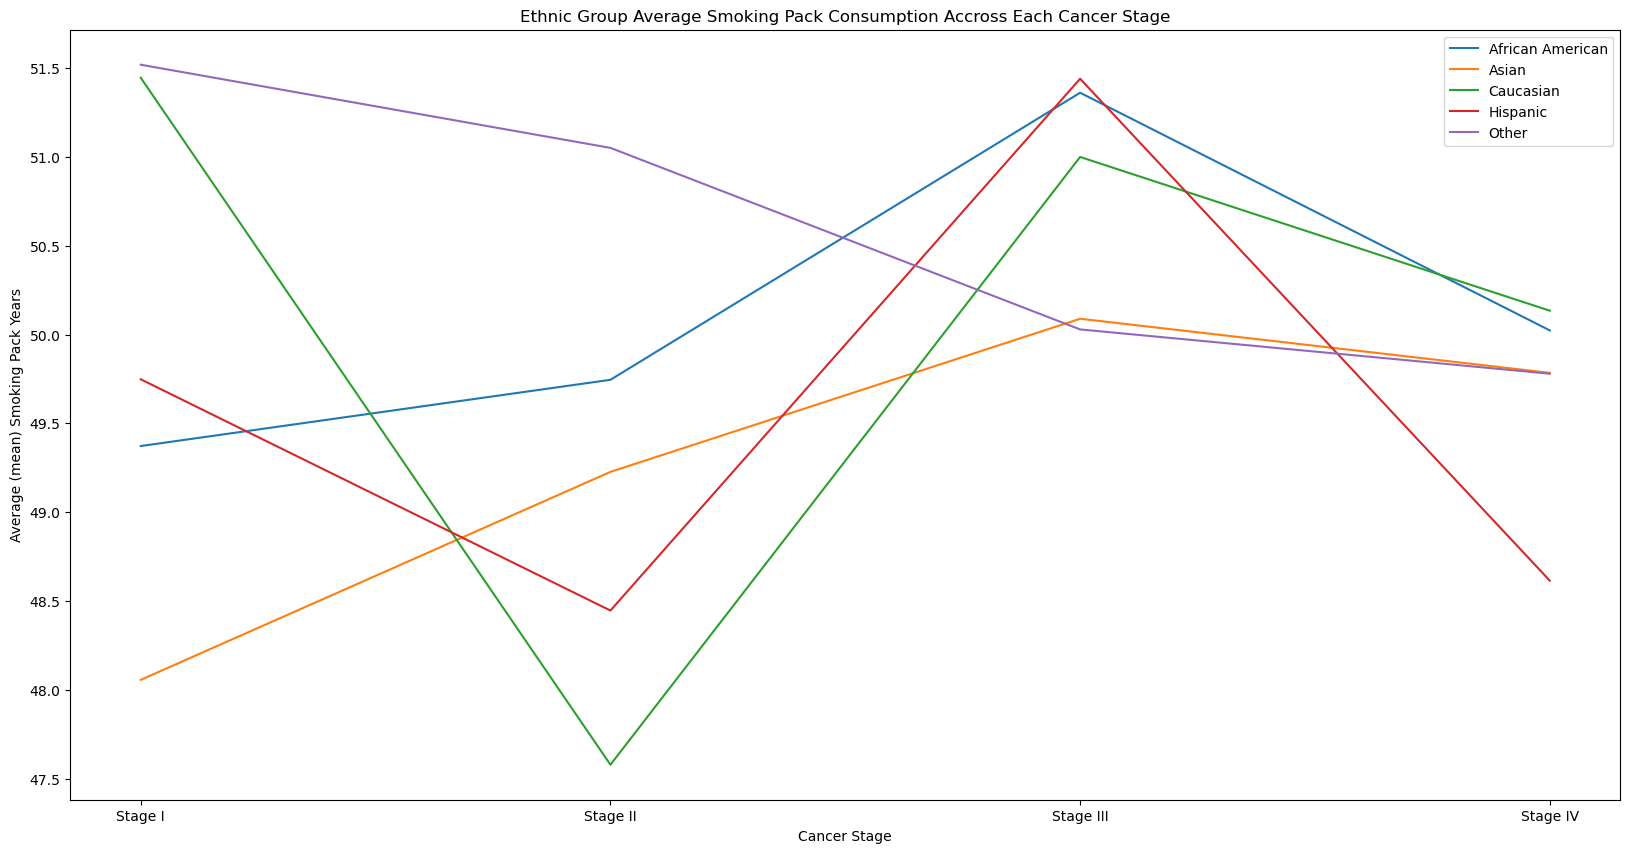

In [74]:
# get Stage, Smoking Pack and Ethnicity columns from the lung cancer DataFrame
smoking_consumption = lung_cancer_df.loc[:, ['Stage', 'Smoking_Pack_Years', 'Ethnicity']]

# in order to determine the average smoking for each cancer stage in each ethnic group
# the DataFrame must first be grouped by ethnicity and stage columns.
smoking_consumption = smoking_consumption.groupby(['Ethnicity', 'Stage'])[['Smoking_Pack_Years']].mean()
smoking_consumption.reset_index(inplace=True)

grp = smoking_consumption.groupby('Ethnicity')

fig = plt.figure(figsize=(20,10))

x_cancer_stages = smoking_consumption.Stage.unique().tolist()
for ethnicity in smoking_consumption.Ethnicity.unique().tolist():
   y_mean_smoking_pack_years = grp.get_group(ethnicity).Smoking_Pack_Years.to_list()
   plt.plot(x_cancer_stages, y_mean_smoking_pack_years, label=ethnicity)

plt.xlabel("Cancer Stage")
plt.ylabel("Average (mean) Smoking Pack Years")
plt.title("Ethnic Group Average Smoking Pack Consumption Accross Each Cancer Stage")
plt.legend()
plt.show()


## c3. Create a chart that visually compares the average of all blood pressure types across different treatment types within a single chart

Blood_Pressure_Systolic     134.462381
Blood_Pressure_Diastolic     84.475780
Blood_Pressure_Pulse         79.585299
dtype: float64


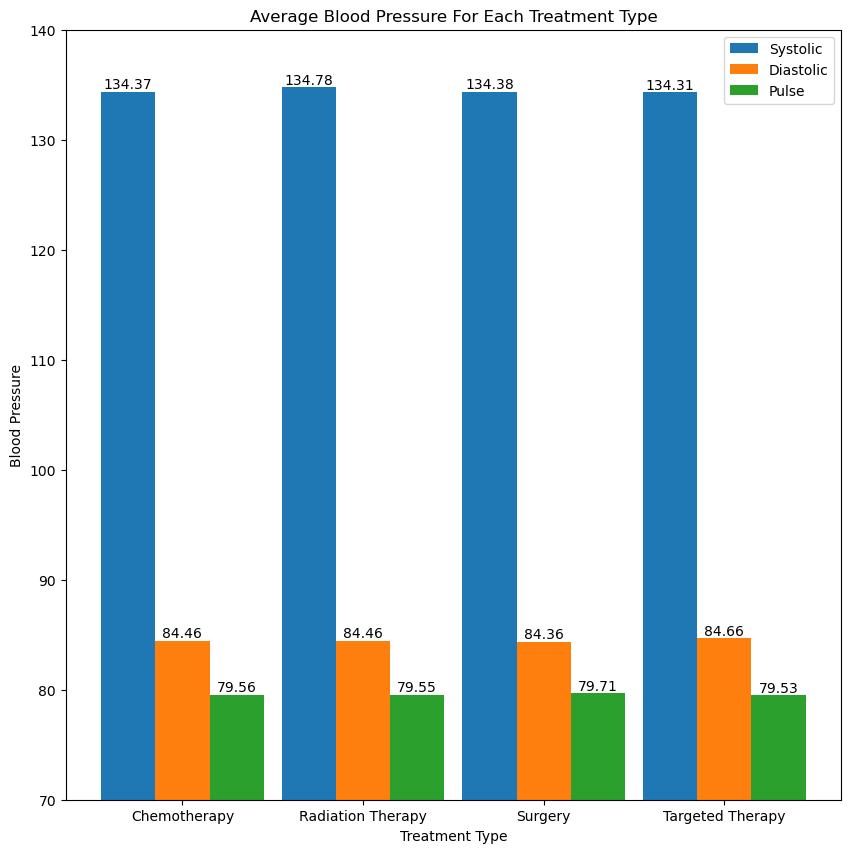

In [ ]:
treatment_blood_press_df = lung_cancer_df.loc[:, ['Treatment', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse']]

treatment_blood_press = treatment_blood_press_df.groupby('Treatment')[['Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse']].mean()

x_treatment = treatment_blood_press.index.to_list()
# in order to divide a bar into three, a numpy array is required to offset the bar
x_axis = np.arange(len(x_treatment))

y_systolic = treatment_blood_press.Blood_Pressure_Systolic.to_list()
y_diastolic = treatment_blood_press.Blood_Pressure_Diastolic.to_list()
y_pulse = treatment_blood_press.Blood_Pressure_Pulse.to_list()

fig = plt.figure(figsize=(10,10))

blood_pressure_bars = []
blood_pressure_bars.append(plt.bar(x_axis-0.3, y_systolic, width=0.3, label='Systolic'))
blood_pressure_bars.append(plt.bar(x_axis, y_diastolic, width=0.3, label='Diastolic'))
blood_pressure_bars.append(plt.bar(x_axis+0.3, y_pulse, width=0.3, label="Pulse"))

for bar in blood_pressure_bars:
    plt.bar_label(bar, fmt="%.2f")
plt.xticks(x_axis, x_treatment)
plt.xlabel("Treatment Type")
plt.ylabel("Blood Pressure")
plt.ylim((70,140))
plt.legend()
plt.title("Average Blood Pressure For Each Treatment Type")
plt.show()

## c4. Create a visualisation of your selection to showcase information related to patients, treatment, or conditions that can reveal trends, behaviours, or patterns, ensuring it is distinct from previous requirements.

### problem statement

Show the pattern of treatment types for each insurer by using the count of each treatment type

### Solution

A bar chart showing the following information:

    - x axis of labels corresponding to each insurer
    - For each insurer, a bar containing the counts of each treatment
    - y axis shows the treatment count

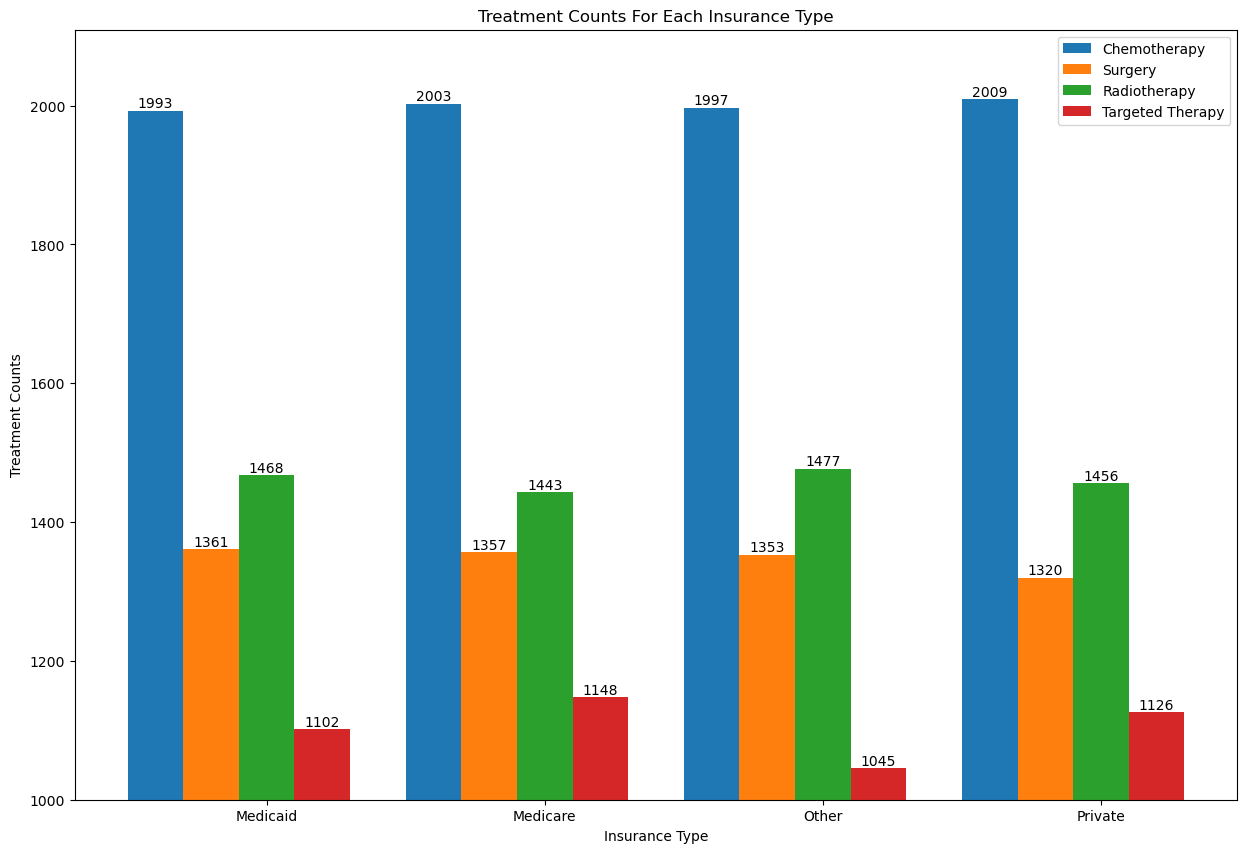

In [ ]:
treatment_provider_df = lung_cancer_df.loc[:, ['Treatment', 'Insurance_Type']]

""" in order to get a repeatable order of treatments, that correspond to each insurer
    the value counts series must be sorted by its index.
    The index is then reset to return a DataFrame for further wrangling
    This also provides the value counts as column in the new DataFrame.
"""
insurance_treatment_counts = treatment_provider_df.groupby(['Treatment']).Insurance_Type.value_counts().sort_index().reset_index()

# x axis labels
labels = insurance_treatment_counts['Insurance_Type'].unique()
x_axis = np.arange(len(labels))

# in order to get the count of each treatment, the DataFrame must me grouped by Treatment
treatment_groups_df = insurance_treatment_counts.groupby('Treatment')

# get the count of each treatment
y_chemo_count = treatment_groups_df.get_group('Chemotherapy')['count'].to_list()
y_surgery_count = treatment_groups_df.get_group('Surgery')['count'].to_list()
y_radio_count = treatment_groups_df.get_group('Radiation Therapy')['count'].to_list()
y_targeted_count = treatment_groups_df.get_group('Targeted Therapy')['count'].to_list()

fig = plt.figure(figsize=(15,10))

treatment_bars = []
bar_width = 0.2
treatment_bars.append(plt.bar(x_axis-0.4, y_chemo_count, width=bar_width, label='Chemotherapy'))
treatment_bars.append(plt.bar(x_axis-0.2, y_surgery_count, width=bar_width, label='Surgery'))
treatment_bars.append(plt.bar(x_axis, y_radio_count, width=bar_width, label="Radiotherapy"))
treatment_bars.append(plt.bar(x_axis+0.2, y_targeted_count, width=bar_width, label="Targeted Therapy"))

for bar in treatment_bars:
    plt.bar_label(bar)
plt.xticks(x_axis, labels)
plt.xlabel("Insurance Type")
plt.ylabel("Treatment Counts")
plt.ylim(bottom=1000)
plt.legend()
plt.title("Treatment Counts For Each Insurance Type")
plt.show()